#### IMPORTING REQUIRED LIBRARIES 

In [5]:
### IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np

### libraries for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#### Libraries for modeling from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [7]:
%matplotlib inline

#### LOADING DATA SET 

In [8]:
train_df = pd.read_csv('train_E1GspfA.csv')
train_df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [9]:
train_df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [10]:
# checking the shape of dataframe
train_df.shape

(18247, 3)

In [11]:
### checking the datatype for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


The dataset doesnot contains any null values 

In [12]:
test_df = pd.read_csv('test_6QvDdzb.csv')
test_df.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [13]:
test_df.shape

(7650, 2)

#### EXTRACTING MORE FEATURES FROM DATE COLUMN 

In [14]:
#### A common function for extracting features from both the train and the test data 
def extracting_feature(data):
    ### converting the date column into datetime format
    data['date'] = pd.to_datetime(data['date'])
    ### extracting year 
    data['year'] = data['date'].dt.year
    ### extracting month
    data['month'] = data['date'].dt.month
    ## extracting the day 
    data['day'] = data['date'].dt.day
    ### extracting the day of year
    data['dayofyear'] = data['date'].dt.dayofyear
    ### extracting the week of year
    data['weekofyear'] = data['date'].dt.weekofyear
    ### extracting day of week
    data['day_no_week'] = data['date'].dt.dayofweek
    ### extracting quarter 
    data['quarter']=data['date'].dt.quarter
    return data
    

In [15]:
train_df = extracting_feature(train_df)
train_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,date,hour,demand,year,month,day,dayofyear,weekofyear,day_no_week,quarter
0,2018-08-18,9,91,2018,8,18,230,33,5,3
1,2018-08-18,10,21,2018,8,18,230,33,5,3
2,2018-08-18,13,23,2018,8,18,230,33,5,3
3,2018-08-18,14,104,2018,8,18,230,33,5,3
4,2018-08-18,15,81,2018,8,18,230,33,5,3


In [16]:
### appling same function in test data 
test_df = extracting_feature(test_df)
test_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


(7650, 9)

In [17]:
## checking for duplicate raws
train_df.duplicated().sum()

0

In [18]:
# checking the null values in each columns
train_df.isnull().sum()

date           0
hour           0
demand         0
year           0
month          0
day            0
dayofyear      0
weekofyear     0
day_no_week    0
quarter        0
dtype: int64

In [19]:
## Descriptive Statistics
train_df.describe()

,hour,demand,year,month,day,dayofyear,weekofyear,day_no_week,quarter
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430,181.799090,26.543706,3.025867,2.501233
std,6.544963,41.678988,0.810979,3.618189,8.772904,110.599321,15.828694,2.003638,1.167955
min,0.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000,78.000000,12.000000,1.000000,1.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000,185.000000,27.000000,3.000000,3.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000,282.000000,41.000000,5.000000,4.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000,366.000000,53.000000,6.000000,4.000000


### Exploratory Analysis and Visualization 

In [20]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 6)

In [21]:
fig = px.histogram(train_df, 
                   x='demand', 
                   marginal='box', 
                   nbins=80, 
                   title='Distribution of car rentals demand')
fig.update_layout(bargap=0.1)
fig.show()

In this histogram showing demand most of the data are falling on the left side of the histogram and hence it is skewed to right.

[Text(0.5, 1.0, 'Avg. Car demand per hour in a day')]

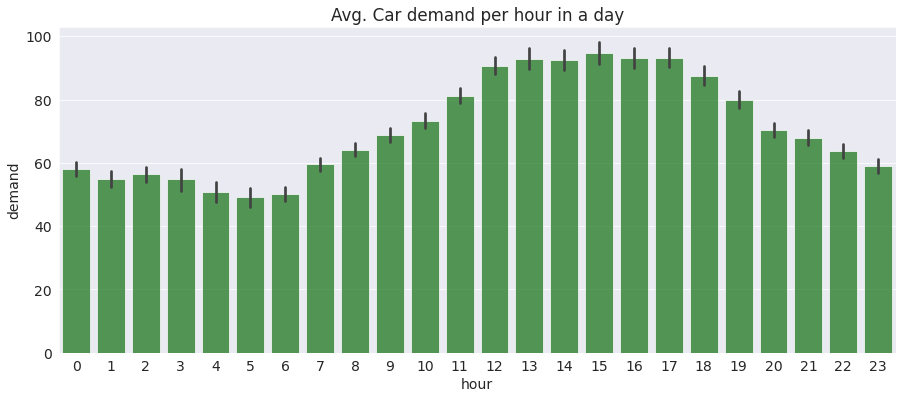

In [22]:
sns.barplot(x= 'hour',y='demand', data = train_df, color = 'green',alpha = 0.7).set(title='Avg. Car demand per hour in a day')

The average demand of cars high in between 12 pm to 5 pm and showing very less compared to other time in early morning  in between 5-6

[Text(0.5, 1.0, 'Avg. Car demand per hour in Month')]

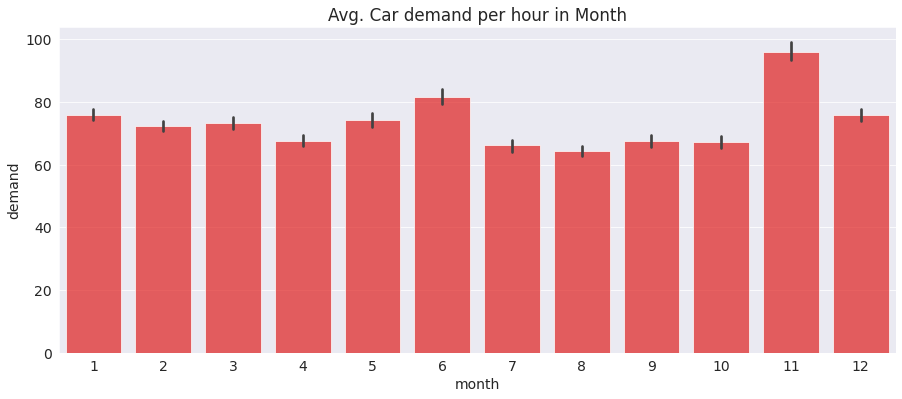

In [23]:
sns.barplot(x= 'month',y='demand', data = train_df, color = 'red',alpha = 0.7).set(title='Avg. Car demand per hour in Month')

The avg. car demand is higher in November and June.

[Text(0.5, 1.0, 'Avg. hourly Car demand per days')]

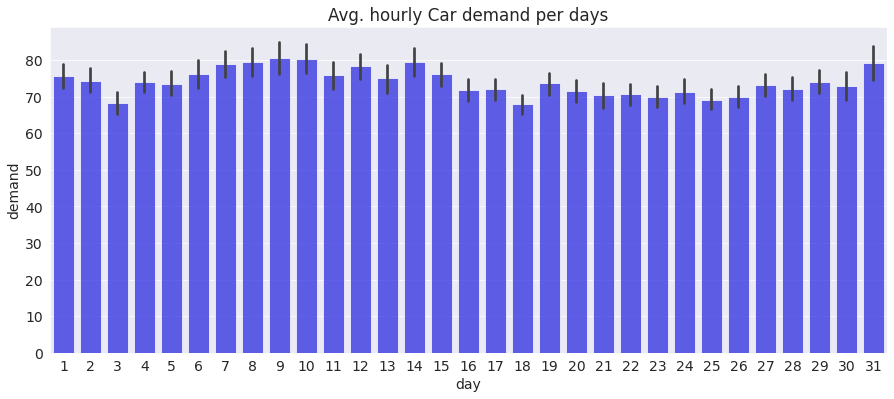

In [53]:
sns.barplot(x= 'day',y='demand', data = train_df, color = 'blue',alpha = 0.7).set(title='Avg. hourly Car demand per days')

[Text(0.5, 1.0, 'Avg. hourly Car demand per quarter in years')]

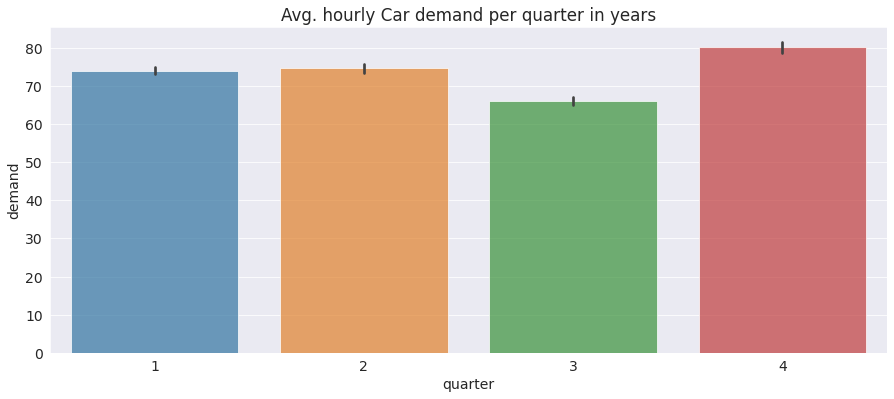

In [54]:
sns.barplot(x= 'quarter',y='demand', data = train_df,alpha = 0.7).set(title='Avg. hourly Car demand per quarter in years')

The forth quarter have avg. higher demnad in cars and lesser in 3 rd quarter

[Text(0.5, 1.0, 'Avg. hourly Car demand per years')]

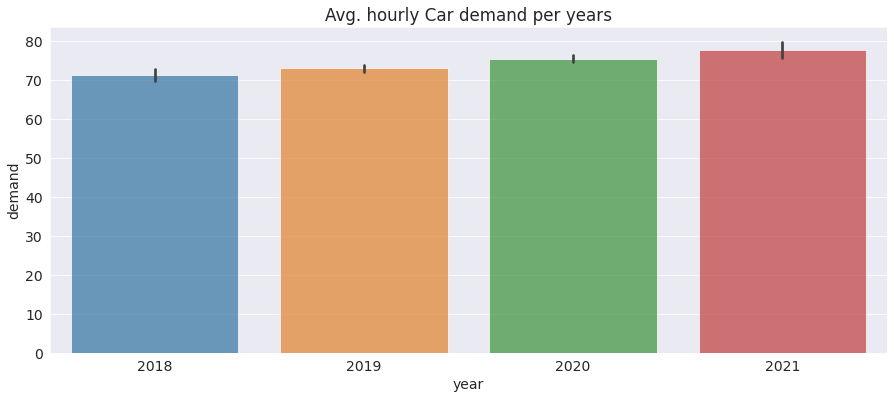

In [55]:
sns.barplot(x= 'year',y='demand', data = train_df,alpha = 0.7).set(title='Avg. hourly Car demand per years')

The avg car demnad is increasing each year compared to the previous year.

### Feature selection

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



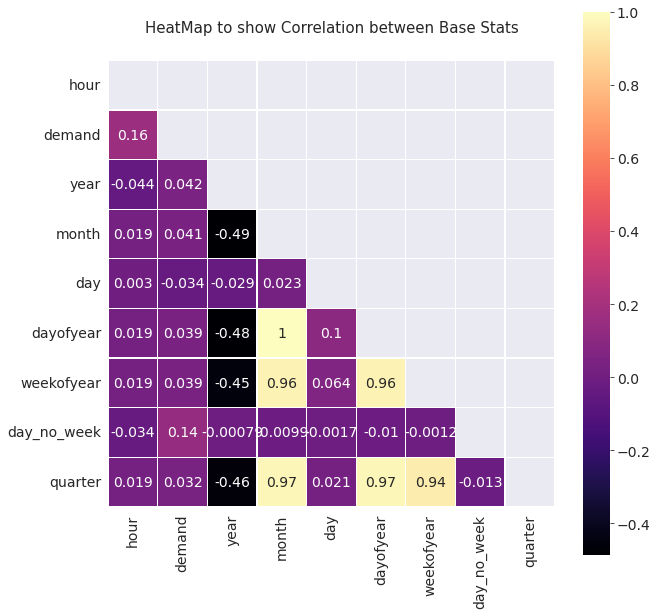

In [27]:
### correlation between independent varibles
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
Corr = train_df
colormap = plt.cm.magma
plt.title('HeatMap to show Correlation between Base Stats', y=1.05, size=15)
sns.heatmap(Corr.corr(),linewidths=0.1,vmax=1, square=True, cmap=colormap, linecolor='white', annot=True,mask=mask)

In [28]:
#### identifing the features which are higly correlated (< 0.9) and eliminating one of two features that have a correlation higher than 0.9

correlated_features = set()
correlation_matrix = train_df.corr()


for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [29]:
correlated_features

{'dayofyear', 'quarter', 'weekofyear'}

In [30]:
### droping the features have correlation higher than 0.9 
selected_cols = train_df.columns.drop(list(correlated_features))

In [31]:
selected_cols

Index(['date', 'hour', 'demand', 'year', 'month', 'day', 'day_no_week'], dtype='object')

In [32]:
X_train =  train_df[selected_cols].drop(['demand','date'],axis=1)
y_train = train_df['demand']
X_test = test_df[['hour', 'year', 'month', 'day', 'day_no_week']]

In [33]:
print(X_train.shape,X_train.columns)
print(y_train.shape)
print(X_test.shape,X_test.columns)

(18247, 5) Index(['hour', 'year', 'month', 'day', 'day_no_week'], dtype='object')
(18247,)
(7650, 5) Index(['hour', 'year', 'month', 'day', 'day_no_week'], dtype='object')


# Model Selection

## Generic function for model selection

In [34]:
### Generic function for fitting different models
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
def fit_model(model, X, y, cv, X_test):
    cv_score = cross_val_score(model, X, y, cv=cv, scoring="neg_root_mean_squared_error")
    
    print("\nModel Report")
    print("RMSE score is : Mean - %.4g " % (-1 * np.mean(cv_score)))
    
    ### model fitting
    model.fit(X, y)
    prediction_train = model.predict(X)
    
    ### predicting the test data
    prediction_test =  model.predict(X_test)
    
    return prediction_test

### Model1 : LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
fit_model(lr, X_train, y_train, 5,X_test)


Model Report
RMSE score is : Mean - 40.42 


array([57.47735146, 58.55319491, 59.62903835, ..., 80.38257634,
       81.45841978, 82.53426322])

### Model2 :  DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
regressor_DT = DecisionTreeRegressor(max_depth=3,min_samples_leaf=1,min_samples_split = 2) 

In [38]:
fit_model(regressor_DT, X_train, y_train, 5, X_test)


Model Report
RMSE score is : Mean - 38.45 


array([53.96795422, 53.96795422, 53.96795422, ..., 63.01754386,
       63.01754386, 63.01754386])

### model3: RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(max_depth=10,max_features = 'sqrt',min_samples_leaf=8,min_samples_split=5,n_estimators=100)

In [40]:
fit_model(model_3, X_train, y_train, 5, X_test)


Model Report
RMSE score is : Mean - 36.25 


array([53.76108845, 52.30801036, 53.00022667, ..., 65.62281978,
       63.25332344, 61.99447269])

### Model4:xgboost

In [41]:
xgbr = XGBRegressor(learning_rate=0.05, objective='reg:squarederror', n_estimators=60, max_depth=6)

In [42]:
fit_model(xgbr, X_train, y_train, 5, X_test)


Model Report
RMSE score is : Mean - 36.24 


array([59.448772, 47.665806, 49.38638 , ..., 59.572647, 54.416035,
       54.616215], dtype=float32)

The RMSE value obtaiend through cross_val_score helper function on the the dataset are not seems much good as the values of RMSE score seems much high. In order improve the model's accuracy and reduce the RMSE value again I am going to update the  general function including gridsearch cv for parameter tuning and again fit the same models

## A general function for hyper parameter tuning and finding the best model

In [43]:
def fit_model_para(model, X, y, X_test, param_grid):
  cv_method = RepeatedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=10)
  
  gs = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        cv=cv_method,
                        verbose=1,  # verbose: the higher, the more messages
                        scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
    
  
  gs.fit(X_train, y_train)

  print("\nModel Reports")
  print("The best Param for the model is: ", gs.best_params_)
  print("RMSE value for this model is : ", -1 * gs.best_score_)

  prediction_train = gs.predict(X)
    
  ### predicting the test data
  prediction_test =  gs.predict(X_test)

  return prediction_test

## Random Forest Regressor

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5,8, 10,],
    'n_estimators': [100, 200]
}

RF = RandomForestRegressor()

fit_model_para(RF, X_train, y_train,X_test,param_grid)

Fitting 15 folds for each of 108 candidates, totalling 1620 fits

Model Reports
The best Param for the model is:  {'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}
RMSE value for this model is :  32.34137756425717


array([61.53978119, 52.45537884, 52.6224724 , ..., 65.33345437,
       62.10110993, 62.64244415])

### Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,7,8,9,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

DT = DecisionTreeRegressor(random_state=0)

fit_model_para(DT, X_train, y_train, X_test, param_grid)

Fitting 15 folds for each of 96 candidates, totalling 1440 fits

Model Reports
The best Param for the model is:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}
RMSE value for this model is :  35.1878589727133


array([65.55555556, 50.18796992, 50.18796992, ..., 58.9047619 ,
       51.25675676, 51.25675676])

### XG Boost Regressor

In [45]:
# A parameter grid for XGBoost
xgb  = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,5,7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200]}
    

In [46]:
fit_model_para(xgb, X_train, y_train, X_test, parameters)

Fitting 15 folds for each of 9 candidates, totalling 135 fits

Model Reports
The best Param for the model is:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
RMSE value for this model is :  32.98926159172715


array([75.12786 , 58.146763, 57.303154, ..., 65.567276, 62.656425,
       62.041252], dtype=float32)

### LGBM Regressor

In [47]:
param_grid={"estimator__boosting_type":['rf'],"estimator__learning_rate": [0.07,0.05, 0.01],
                 "estimator__n_estimators": [10,25], "estimator__max_bin": [10,25],
                 "estimator__max_depth": [1,2], "estimator__num_leaves": [5,7,10,25]}

lgm = LGBMRegressor()

In [48]:
fit_model_para(lgm, X_train, y_train, X_test,param_grid)

Fitting 15 folds for each of 96 candidates, totalling 1440 fits

Model Reports
The best Param for the model is:  {'estimator__boosting_type': 'rf', 'estimator__learning_rate': 0.07, 'estimator__max_bin': 10, 'estimator__max_depth': 1, 'estimator__n_estimators': 10, 'estimator__num_leaves': 5}
RMSE value for this model is :  32.09503388599971


array([60.30217424, 51.69372621, 52.20974036, ..., 67.25915276,
       68.54008229, 62.36602829])

The hyper parametr tuning gives better results in all the models

In [49]:
### the best model is showing in LGM which have RMSE value of 32.09 which is least compared to other models
final_model = fit_model_para(lgm, X_train, y_train, X_test,param_grid)

Fitting 15 folds for each of 96 candidates, totalling 1440 fits

Model Reports
The best Param for the model is:  {'estimator__boosting_type': 'rf', 'estimator__learning_rate': 0.07, 'estimator__max_bin': 10, 'estimator__max_depth': 1, 'estimator__n_estimators': 10, 'estimator__num_leaves': 5}
RMSE value for this model is :  32.09503388599971


In [50]:
pd.DataFrame({'date':test_df['date'],'hour':test_df['hour'],'demand':final_model }).set_index('date')

,hour,demand
date,,
2021-03-01,0,60.302174
2021-03-01,1,51.693726
2021-03-01,2,52.209740
2021-03-01,3,52.209740
2021-03-01,5,53.843516
...,...,...
2022-03-28,19,85.472465
2022-03-28,20,71.476563
2022-03-28,21,67.259153
